In [1]:
import os
import librosa
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display

from sklearn.mixture import GaussianMixture
import pickle

In [2]:
DATASET_DIR = 'I:/wav_files/'

In [3]:
classes = os.listdir(DATASET_DIR)
classes = [na for na in classes if na[0]!='.']
print(classes)

['guest', 'presenter', 'report']


In [4]:
data, sr = readwav(dataset[0])
mfccs = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=32)

NameError: name 'readwav' is not defined

In [21]:
mfccs.T.shape

(3349, 32)

# Feature preprocessing and storage

In [4]:
### feature extraction and saving on hard drive
def store_features(file_in, file_out, data, sr):
    mfccs = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=32)
    mfccs = mfccs.T
    with open(file_out, 'wb') as handle:
        pickle.dump(mfccs, handle)

In [5]:
for _dir in classes:
    print(_dir)

guest
presenter
report


In [4]:
dataset = os.listdir(os.path.join(DATASET_DIR, classes[0]))

dataset = [os.path.join(DATASET_DIR, _dir, _file) for _dir in classes for _file in os.listdir(os.path.join(DATASET_DIR, _dir)) if _file[-1]!='f']


In [5]:
def readwav(path):
    wav,fs = librosa.load(path)
    #wav = Struct / np.power(2, Struct.sampwidth * 8 - 1)
    #fs = Struct.rate
    return wav, fs

In [10]:
for _dt_file in dataset:
    x, sr = readwav(_dt_file)
    store_features(_dt_file, _dt_file+".f", x, sr)

NameError: name 'store_features' is not defined

In [6]:
def load_feature(feature_file):
    return pickle.load( open(feature_file, "rb" ) ) 

In [5]:
name = os.listdir(os.path.join(DATASET_DIR, classes[0]))[0]+".f"
name = os.path.join(DATASET_DIR, classes[0], name)

In [6]:
sam = load_feature(name)

In [7]:
sam.shape

(3349, 32)

In [7]:
# See https://github.com/yongxuUSTC/sednn/blob/master/mixture2clean_dnn/main_dnn.py

def mat_2d_to_3d(x, agg_num, hop):
    
    len_x, n_in = x.shape
    
    if (len_x < agg_num):
        x = np.concatenate((x, np.zeros((agg_num - len_x, n_in))))
        
    len_x = len(x)
    i1 = 0
    x3d = []
    while (i1 + agg_num <= len_x):
        x3d.append(x[i1 : i1 + agg_num])
        i1 += hop
    return np.array(x3d)

In [9]:
from random import shuffle

# Prepare Test-Train dataset (using shuffle and partitioning)

In [11]:
#range(_tst_files+_trt_files, len(dataset))

In [12]:
test = {}
train1 = {}
train2 = {}
#train= {}
for _cls in classes:
    dataset = os.listdir(os.path.join(DATASET_DIR, _cls))
    dataset = [na for na in dataset if na[-1] == 'f']
    print(dataset)
    
    shuffle(dataset)
    _tst_files = int(0.2*(len(dataset)))+1 #tricky
    _trt_files = int(0.4*(len(dataset)))+1 #tricky
    
    test[_cls] = []
    train1[_cls] = []
    train2[_cls] = []
    #train[_cls] = []
    
    for i in range(_tst_files):
        test[_cls].append(os.path.join(DATASET_DIR, _cls, dataset[i]))
        
    for i in range(_tst_files, _trt_files):
        train1[_cls].append(os.path.join(DATASET_DIR, _cls, dataset[i]))
        
    for i in range(_tst_files+_trt_files, len(dataset)):
        train2[_cls].append(os.path.join(DATASET_DIR, _cls, dataset[i]))

    #for i in range(_tst_files, len(dataset)):
     #   train[_cls].append(os.path.join(DATASET_DIR, _cls, dataset[i]))


['00BA15A7-341E-4F65-BA88-EACB688D9746_0.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_1.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_10.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_11.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_12.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_13.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_14.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_15.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_16.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_17.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_18.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_19.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_2.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_20.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_21.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_22.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_3.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_4.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_5.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_6.wav.f', '00BA15A7-341E-4F65-BA88-E

In [13]:
len(train1['report'])

146

In [8]:
def get_features_lst(dataset_files):
    ft_lst = []
    for _fl in dataset_files:
        feat = load_feature(_fl)
        ft_lst.append(feat)
        
    return np.concatenate(ft_lst)

In [9]:
hopping_frames = 8
concat_frames = 32

In [10]:
from keras.utils import to_categorical

Using TensorFlow backend.


In [17]:
classes = train2.keys()
cls_to_id = {cls : i for i, cls in enumerate(classes)}
to_categorical([0,1,1,1,1,1,2]) # how we could use keras utils

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [11]:
# prepare arrays for keras Train_x, Train_y using scaler
import keras
def read_dataset(dic_dataset, concat, hop, scaler):
    ds_x = []
    ds_y = []
    for key, val in dic_dataset.items():
        for sample in val:
            
            _ds_feat = load_feature(sample)
            _ds_feat = scaler.transform(_ds_feat)
            
            _ds_feat =keras.preprocessing.sequence.pad_sequences(_ds_feat.T, maxlen=5000, padding='post', dtype='float32')
            x = mat_2d_to_3d(_ds_feat, concat, hop)
            #print(type(x))
            x = np.expand_dims(x, axis=-1)
            
            
            y = [cls_to_id[key]] * x.shape[0]
            ds_x.append(x)
            
            ds_y.append(y)
            
    return np.concatenate(ds_x), to_categorical(np.concatenate(ds_y))

# Scaler for features

## we use standard scaler on training data and use also for evaluation for test data!


In [19]:
d=dict(train2)

In [20]:
d.update(train1)

In [21]:
d.update(test)

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_mean=True, with_std=True)

In [12]:
def features_for_scaler(dic_dataset):
    ds_x = []
    for key, val in dic_dataset.items():
        for sample in val:
            
            _ds_feat = load_feature(sample)
            ds_x.append(_ds_feat)
            
    return np.concatenate(ds_x, axis=0)



In [24]:
ft_sc = features_for_scaler(d)
sc.fit(ft_sc)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [25]:
d=0
ft_sc=0

# Prepare data for Neural Network and keras

In [26]:
tr_x2=[]
tr_y2=[]

In [27]:
tr_x2, tr_y2 = read_dataset(train2, concat_frames, hopping_frames, sc)

In [28]:
np.save('tr_x2.npy',tr_x2)
np.save('tr_y2.npy',tr_y2)

In [29]:
tr_x2=[]
tr_y2=[]

In [30]:
#test=np.(tr_x1)

In [31]:
#test=np.reshape(test,(1901,324,32,32))

In [32]:
tr_x1, tr_y1 = read_dataset(train1, concat_frames, hopping_frames, sc)

In [33]:
np.save('tr_x1.npy',tr_x1)
np.save('tr_y1.npy',tr_y1)

In [34]:
tr_x1=[]
tr_y1=[]

In [35]:
tst_x, tst_y = read_dataset(test, concat_frames, hopping_frames, sc)

In [36]:
np.save('tst_x.npy',tst_x)
np.save('tst_y.npy',tst_y)

In [37]:
tst_x=[]
tst_y=[]

In [38]:
# Different technique of data split using sklearn module

#from sklearn.model_selection import train_test_split
#tr_x2, val_x, tr_y2, val_y = train_test_split(tr_x2, tr_y2, test_size=0.25)

In [39]:
tr_x2

[]

# Load data

In [2]:
tr_x1= np.load('tr_x1.npy')
tr_y1= np.load('tr_y1.npy')
tr_x2= np.load('tr_x2.npy')
tr_y2= np.load('tr_y2.npy')

In [3]:
tst_x= np.load('tst_x.npy')
tst_y= np.load('tst_y.npy')

# Display input features (how hop works)

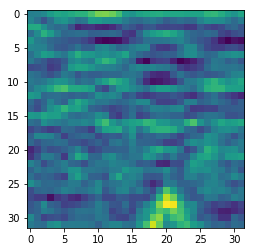

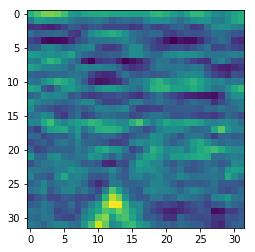

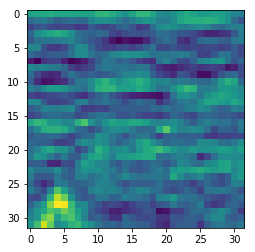

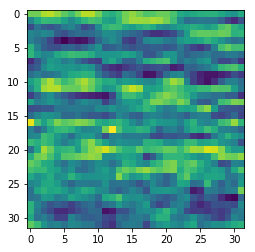

In [7]:
for _smpl in range(4):
    feature_img = tr_x2[_smpl]
    plt.imshow(np.squeeze(feature_img).T)
    plt.show()

# For unbalanced dataset prepare class weights

In [4]:
z=[]
for t in tr_y2:
    if t[0]==1:
        z.append(1)
    elif t[1]==1:
        z.append(2)
    else:
        z.append(3)


In [5]:
from sklearn.utils import class_weight
from sklearn import model_selection, preprocessing
encoder = preprocessing.LabelEncoder()
encoder.fit(z)
class_weights = class_weight.compute_class_weight('balanced',np.unique(z),z)
#sample_weights = class_weight.compute_sample_weight('balanced', y)
class_weights_dict = dict(zip(encoder.transform(list(encoder.classes_)), class_weights))
class_weights_dict

{0: 0.7513353115727003, 1: 0.6948408342480791, 2: 4.350515463917525}

In [6]:
cls_weight=class_weights_dict
tr_x2.shape

(3798, 32, 5000, 1)

In [4]:
#tr_x2=np.reshape(tr_x2,(tr_x2.shape[0],tr_x2.shape[1],500,10))
#tr_x1=np.reshape(tr_x1,(tr_x1.shape[0],tr_x1.shape[1],500,10))
tst_x=np.reshape(tst_x,(tst_x.shape[0],tst_x.shape[1],500,10))

tr_x2.shape

NameError: name 'tr_x2' is not defined

# Prepare keras model and train

In [2]:
def show_summary_stats(history):
    # List all data in history
    print(history.history.keys())

    # Summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
import matplotlib.pyplot as plt
def plot_curve(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

#weighted_prediction = wclf.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
#def print_results(y, weighted_prediction):
 #   print ('Accuracy:', accuracy_score(y, weighted_prediction))
  #  print ('F1 score:', f1_score(y, weighted_prediction,average='weighted'))
   # print ('Recall:', recall_score(y, weighted_prediction,average='weighted'))
    #print ('Precision:', precision_score(y, weighted_prediction,average='weighted'))
    #labels =[0,1,2,3]
    #target_names = ['suivant','precedent','courant','autres']
    #print(classification_report(y,weighted_prediction,labels=labels,target_names= target_names,digits=3))
    
def print_results(y, weighted_prediction):
    print ('Accuracy:', accuracy_score(y, weighted_prediction))
    print ('F1 score:', f1_score(y, weighted_prediction,average='weighted'))
    print ('Recall:', recall_score(y, weighted_prediction,average='weighted'))
    print ('Precision:', precision_score(y, weighted_prediction,average='weighted'))
    labels =[0,1,2]
    target_names = ['presenter','report','guest']
    print(classification_report(y,weighted_prediction,labels=labels,target_names= target_names,digits=3))

In [3]:
import tensorflow as tf

In [4]:
#from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input,BatchNormalization,Activation,ELU
from keras.layers import Conv1D, Conv2D, MaxPooling2D,MaxPool1D, GlobalMaxPool1D,GlobalMaxPool2D, GlobalAveragePooling1D, \
    concatenate
from keras.layers import Convolution1D,Convolution2D
from keras import optimizers, losses, activations, models
from keras import backend as K
import keras
batch_size = 128
epochs=200

Using TensorFlow backend.


# CNN1

In [5]:
%%time
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 7),
                 activation='relu',
                 input_shape=(32,500,10)))

model.add(Conv2D(64, (3, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
################################
model.add(Conv2D(128, (3, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 7), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

###################### ######### sigmoid

saver = keras.callbacks.ModelCheckpoint('model_cnn1_mfcc.h5', monitor='val_loss', verbose=0, save_best_only=True,
                                save_weights_only=False, mode='auto', period=1)

lron = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=5, min_lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

W0328 17:36:08.064140  2524 deprecation_wrapper.py:119] From C:\Users\dhi\Anaconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0328 17:36:08.120351  2524 deprecation_wrapper.py:119] From C:\Users\dhi\Anaconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0328 17:36:08.139335  2524 deprecation_wrapper.py:119] From C:\Users\dhi\Anaconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0328 17:36:08.226707  2524 deprecation_wrapper.py:119] From C:\Users\dhi\Anaconda3\envs\tf-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0328 17:36:08.230703  2524 deprecation

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 494, 32)       6752      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 488, 64)       43072     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 244, 64)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 244, 64)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 238, 128)      172160    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 119, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 119, 128)       0         
__________

In [62]:
model.fit(tr_x2, tr_y2,
          batch_size=batch_size,
          epochs=200,
          shuffle=True,
          verbose=1,
          validation_data=(tr_x1, tr_y1),
          callbacks=[saver, lron],
         class_weight = cls_weight 
         )



Train on 3798 samples, validate on 1901 samples
Epoch 1/200
3798/3798 [==============================] - 25s 6ms/step - loss: 1.1172 - acc: 0.4550 - val_loss: 1.0513 - val_acc: 0.5418
Epoch 2/200
3798/3798 [==============================] - 22s 6ms/step - loss: 1.0324 - acc: 0.5361 - val_loss: 1.0097 - val_acc: 0.5829
Epoch 3/200
3798/3798 [==============================] - 22s 6ms/step - loss: 0.9771 - acc: 0.6185 - val_loss: 0.9156 - val_acc: 0.6423
Epoch 4/200
3798/3798 [==============================] - 22s 6ms/step - loss: 0.9361 - acc: 0.6311 - val_loss: 0.9431 - val_acc: 0.6228
Epoch 5/200
3798/3798 [==============================] - 22s 6ms/step - loss: 0.8927 - acc: 0.6151 - val_loss: 0.8936 - val_acc: 0.6628
Epoch 6/200
3798/3798 [==============================] - 22s 6ms/step - loss: 0.8506 - acc: 0.6459 - val_loss: 0.7926 - val_acc: 0.6602
Epoch 7/200
3798/3798 [==============================] - 22s 6ms/step - loss: 0.8066 - acc: 0.6369 - val_loss: 0.8462 - val_acc: 0.6754


Epoch 120/200
3798/3798 [==============================] - 22s 6ms/step - loss: 0.1882 - acc: 0.9013 - val_loss: 0.5102 - val_acc: 0.8190
Epoch 121/200
3798/3798 [==============================] - 21s 6ms/step - loss: 0.1694 - acc: 0.9076 - val_loss: 0.4986 - val_acc: 0.8238
Epoch 122/200
3798/3798 [==============================] - 21s 6ms/step - loss: 0.1604 - acc: 0.9110 - val_loss: 0.5207 - val_acc: 0.8127
Epoch 123/200
3798/3798 [==============================] - 21s 6ms/step - loss: 0.1866 - acc: 0.8992 - val_loss: 0.5220 - val_acc: 0.8054
Epoch 124/200
3798/3798 [==============================] - 21s 6ms/step - loss: 0.1779 - acc: 0.9052 - val_loss: 0.5012 - val_acc: 0.8169
Epoch 125/200
3798/3798 [==============================] - 21s 6ms/step - loss: 0.1769 - acc: 0.9118 - val_loss: 0.5091 - val_acc: 0.8217
Epoch 126/200
3798/3798 [==============================] - 21s 6ms/step - loss: 0.1657 - acc: 0.9047 - val_loss: 0.4914 - val_acc: 0.8248
Epoch 127/200
3798/3798 [=========

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


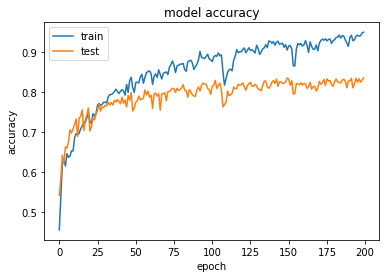

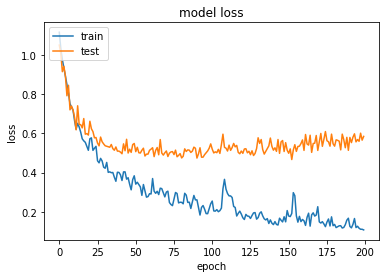

In [63]:
show_summary_stats(model.history)

In [48]:
model.load_weights('model_cnn1_mfcc.h5')
# save the model to disk
filename = 'model_cnn1_mfcc.h5'
pickle.dump(model, open(filename, 'wb'))


NameError: name 'model' is not defined

In [73]:
tr_y2.shape

(3798, 3)

In [5]:
# load the model from disk
loaded_model = pickle.load(open('model_cnn1_mfcc.h5', 'rb'))

score = loaded_model.evaluate(tst_x, tst_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.33140618173105857
Test accuracy: 0.8859095687495171


In [6]:
predictions= loaded_model.predict(tst_x, verbose=1)
weighted_prediction = np.argmax(predictions, axis=1)


1902/1902 [==============================] - 4s 2ms/step


In [51]:
weighted_prediction

array([1, 0, 0, ..., 2, 2, 2], dtype=int64)

In [52]:
y = np.argmax(tst_y, axis=1)
print_results(y , weighted_prediction)

Accuracy: 0.8859095688748686
F1 score: 0.8856702326902145
Recall: 0.8859095688748686
Precision: 0.8858002999498842
              precision    recall  f1-score   support

   presenter      0.881     0.875     0.878       843
      report      0.892     0.909     0.900       913
       guest      0.880     0.801     0.839       146

    accuracy                          0.886      1902
   macro avg      0.884     0.862     0.872      1902
weighted avg      0.886     0.886     0.886      1902



In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2)
class_names=['presenter','guest','report']
# Plot normalized confusion matrix
plot_confusion_matrix(np.argmax(valid_y, axis=1),weighted_prediction , classes=np.asarray(['presenter','guest','report']), normalize=True,title='Normalized confusion matrix')

plt.show()
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)
class_names=['presenter','guest','report']
# Plot normalized confusion matrix
plot_confusion_matrix(np.argmax(valid_y, axis=1),weighted_prediction , classes=np.asarray(['presenter','guest','report']), normalize=True,title='Normalized confusion matrix')

plt.show()

In [15]:
#tr_x2=np.reshape(tr_x2,(tr_x2.shape[0],tr_x2.shape[1],tr_x2.shape[2],1))
#tr_x1=np.reshape(tr_x1,(tr_x1.shape[0],tr_x1.shape[1],tr_x1.shape[2],1))
#tst_x=np.reshape(tst_x,(tst_x.shape[0],tst_x.shape[1],tst_x.shape[2],1))


In [8]:
np.save('D:/tst_y_audio_mfcc_cnn.npy',np.argmax(tst_y, axis=1))
np.save('D:/weighted_prediction_audio_mfcc_cnn.npy',weighted_prediction)

In [49]:
tr_x2.shape

(3798, 1600, 100)

# Lstm model 

In [12]:
from keras import layers,Input
from keras.models import Model
from keras.constraints import maxnorm
from sklearn.utils import class_weight

In [12]:
def lstm_model():
    input_shape = (tr_x2.shape[1], tr_x2.shape[2])
    print("Build LSTM RNN model ...")
    #model = Sequential()

    model = Sequential()

    #model.add(layers.Bidirectional(layers.GRU(units=1024, dropout=0.5, recurrent_dropout=0.5,kernel_constraint=maxnorm(3), return_sequences=True, input_shape=input_shape)))
    model.add(layers.Bidirectional(layers.GRU(units=512, dropout=0.5, recurrent_dropout=0.5,kernel_constraint=maxnorm(3), return_sequences=True, input_shape=input_shape)))
    model.add(layers.Bidirectional(layers.GRU(256, dropout=0.5, recurrent_dropout=0.5,kernel_constraint=maxnorm(3), return_sequences=False)))
    
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(3, activation='softmax'))
    opt = keras.optimizers.Adam()
    model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    #model.summary()
    return model
model=lstm_model()

Build LSTM RNN model ...


In [13]:
%%time
tr_x2=np.reshape(tr_x2,(tr_x2.shape[0],32*10,500))
tr_x1=np.reshape(tr_x1,(tr_x1.shape[0],32*10,500))

saver = keras.callbacks.ModelCheckpoint('model_lstm_mfcc.h5', monitor='val_loss', verbose=0, save_best_only=True,
                                save_weights_only=False, mode='auto', period=1)

lron = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                  patience=5, min_lr=0.001)

model.fit(tr_x2, tr_y2,
          batch_size=64,
          epochs=200,
          shuffle=True,
          verbose=1,
          validation_data=(tr_x1, tr_y1),
          callbacks=[saver, lron],
          class_weight = cls_weight 
         )


Train on 3798 samples, validate on 1901 samples
Epoch 1/200
3798/3798 [==============================] - 221s 58ms/step - loss: 1.1368 - acc: 0.4410 - val_loss: 1.0363 - val_acc: 0.5092
Epoch 2/200
3798/3798 [==============================] - 208s 55ms/step - loss: 0.9704 - acc: 0.5545 - val_loss: 0.8483 - val_acc: 0.6454
Epoch 3/200
3798/3798 [==============================] - 218s 58ms/step - loss: 0.9176 - acc: 0.5987 - val_loss: 0.8619 - val_acc: 0.6544
Epoch 4/200
3798/3798 [==============================] - 233s 61ms/step - loss: 0.8491 - acc: 0.6182 - val_loss: 0.8579 - val_acc: 0.6439
Epoch 5/200
3798/3798 [==============================] - 226s 59ms/step - loss: 0.8174 - acc: 0.6330 - val_loss: 0.8647 - val_acc: 0.6128
Epoch 6/200
3798/3798 [==============================] - 219s 58ms/step - loss: 0.7236 - acc: 0.6606 - val_loss: 0.7547 - val_acc: 0.7028
Epoch 7/200
3798/3798 [==============================] - 227s 60ms/step - loss: 0.6752 - acc: 0.6935 - val_loss: 0.8423 - va

KeyboardInterrupt: 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


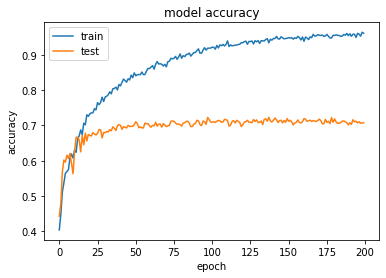

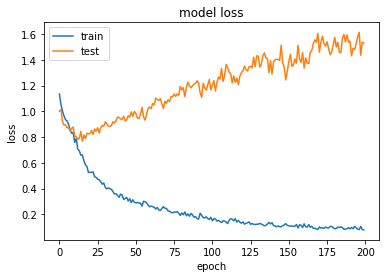

In [16]:
show_summary_stats(model.history)


In [22]:
model.load_weights('model_lstm_mfcc.h5')
# save the model to disk
filename = 'model_lstm_mfcc.h5'
pickle.dump(model, open(filename, 'wb'))

In [11]:
tr_x2=np.reshape(tr_x2,(tr_x2.shape[0],tr_x2.shape[1],tr_x2.shape[2]))
tr_x1=np.reshape(tr_x1,(tr_x1.shape[0],tr_x1.shape[1],tr_x1.shape[2]))

# load the model from disk
loaded_model = pickle.load(open('model_lstm_mfcc.h5', 'rb'))

score = loaded_model.evaluate(tst_x, tst_y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

ValueError: Error when checking input: expected sequential_2_input to have 3 dimensions, but got array with shape (1122325, 32, 32, 1)

In [ ]:
predictions= loaded_model.predict(tst_x, verbose=0)
weighted_prediction = np.argmax(predictions, axis=1)


In [ ]:
y = np.argmax(tst_y, axis=1)
print_results(y , weighted_prediction)

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2)
class_names=['presenter','guest','report']
# Plot normalized confusion matrix
plot_confusion_matrix(np.argmax(valid_y, axis=1),weighted_prediction , classes=np.asarray(['presenter','guest','report']), normalize=True,title='Normalized confusion matrix')

plt.show()
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
np.set_printoptions(precision=2)
class_names=['presenter','guest','report']
# Plot normalized confusion matrix
plot_confusion_matrix(np.argmax(valid_y, axis=1),weighted_prediction , classes=np.asarray(['presenter','guest','report']), normalize=True,title='Normalized confusion matrix')

plt.show()

# Prepare gaussian mixture for each class

In [13]:
test = {}
train = {}
from random import shuffle
for _cls in classes:
    dataset = os.listdir(os.path.join(DATASET_DIR, _cls))
    dataset = [na for na in dataset if na[-1] == 'f']
    print(dataset)
    
    shuffle(dataset)
    _tst_files = int(0.2*(len(dataset)))+1 #tricky
    test[_cls] = []
    train[_cls] = []

    
    for i in range(_tst_files):
        test[_cls].append(os.path.join(DATASET_DIR, _cls, dataset[i]))
        
    for i in range(_tst_files, len(dataset)):
        train[_cls].append(os.path.join(DATASET_DIR, _cls, dataset[i]))


['00BA15A7-341E-4F65-BA88-EACB688D9746_0.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_1.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_10.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_11.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_12.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_13.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_14.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_15.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_16.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_17.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_18.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_19.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_2.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_20.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_21.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_22.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_3.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_4.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_5.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_6.wav.f', '00BA15A7-341E-4F65-BA88-E

['00152FDA-5AB7-4B47-993C-AC8AC4D8C3AB_0.wav.f', '00152FDA-5AB7-4B47-993C-AC8AC4D8C3AB_0.wav.wav.f', '00332E1F-BB1B-42B9-B5B1-1ECA3465F1D9_0.wav.f', '00332E1F-BB1B-42B9-B5B1-1ECA3465F1D9_0.wav.wav.f', '0075C302-1AE5-4D64-894B-2337192ADC90_0.wav.f', '008127EF-D082-4B1C-A250-7BD541D03E73_0.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_0.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_1.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_10.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_11.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_12.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_13.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_14.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_15.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_16.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_17.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_18.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_19.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_2.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_3.wav.f', '00BA15A7-341E-4F65-B

['0055A44E-5AA3-4219-9921-370B2798C536_0.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_0.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_1.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_2.wav.f', '00BA15A7-341E-4F65-BA88-EACB688D9746_3.wav.f', '00E8E2DD-9CB0-48F3-BC14-282195310D79_0.wav.f', '0206330F-44B8-4126-A66F-5C7E2CADAA66_0.wav.f', '024663F1-98E0-4899-9644-0717B478121C_0.wav.f', '03A3D23E-F164-4D69-881C-FA7AAD062ADB_0.wav.f', '045ED5AD-0491-49B5-9C51-68BB0B99AB35_0.wav.f', '0582C012-229A-4A42-9596-A6A89950C075_0.wav.f', '0582C012-229A-4A42-9596-A6A89950C075_1.wav.f', '0582C012-229A-4A42-9596-A6A89950C075_2.wav.f', '0582C012-229A-4A42-9596-A6A89950C075_3.wav.f', '06B1BB7B-4E57-4062-BDCB-E742F32151D0_0.wav.f', '06DE1576-E103-4404-B89E-E4F55E0F73A6_0.wav.f', '06DE1576-E103-4404-B89E-E4F55E0F73A6_1.wav.f', '086CE849-5432-4893-ACF6-C0E1433E8178_0.wav.f', '09C53A45-063A-4E17-A63A-8CE316E037C8_0.wav.f', '0C9F5EC9-4C86-4729-BDCE-D0D1F60BFF90_0.wav.f', '0C9F5EC9-4C86-4729-BDCE-D0D1F60BFF90_1

In [14]:
classifiers = {}
for key, val in train.items():
    cls = GaussianMixture(n_components=32, covariance_type='diag')
    
    _ds_feat = get_features_lst(val)
    cls.fit(_ds_feat)
    
    classifiers[key] = cls

In [25]:
classifiers #each activity class has own classifier

{'guest': GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                 means_init=None, n_components=32, n_init=1,
                 precisions_init=None, random_state=None, reg_covar=1e-06,
                 tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                 weights_init=None),
 'presenter': GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                 means_init=None, n_components=32, n_init=1,
                 precisions_init=None, random_state=None, reg_covar=1e-06,
                 tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                 weights_init=None),
 'report': GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
                 means_init=None, n_components=32, n_init=1,
                 precisions_init=None, random_state=None, reg_covar=1e-06,
                 tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
                 weig

# GMM Evaluation

In [50]:
CONTEXT_FEATURES_LEN = 800 #how many features (in time) we want to use as a context frame

In [51]:
def classify_chunks(chunks, classifiers_dic, g_truth):
    h = 0
    m = 0
    for _ds_feat in chunks:
        
        sc_max = float('-inf')
        cls_max = ''
        for cls, md in classifiers_dic.items():
            score = md.score(_ds_feat)
            if score > sc_max:
                sc_max = score
                cls_max = cls
        if cls_max == g_truth:
            h+=1
        else:
            m+=1
    return h/(h+m)

In [52]:
acc_lst = []
for key, val in test.items():
    print("KEY {}".format(key))
    for file in val:
        try:
            _ds_feat = get_features_lst([file])
            print(_ds_feat.shape)

            ctx_frames = np.array_split(_ds_feat, _ds_feat.shape[0]/CONTEXT_FEATURES_LEN)

            acc = classify_chunks(ctx_frames, classifiers, key)
            acc_lst.append(acc)  
            print(file, "\t", acc, "\n")
        except:
            print('error')
print(np.mean(acc_lst))

KEY guest
(5428, 32)
I:/wav_files/guest\994EF8B4-1B5E-4B73-AB03-22A71E5BEFE3_0.wav.f 	 1.0 

(2443, 32)
I:/wav_files/guest\9409FCF5-0708-4821-8C05-CCE4C877DB85_5.wav.f 	 1.0 

(2701, 32)
I:/wav_files/guest\C1A116F6-CDD3-47FE-87D1-1BB5A5FE1DD5_2.wav.f 	 0.6666666666666666 

(2769, 32)
I:/wav_files/guest\C961DAC4-3BE6-4CFB-9CF6-4DFCF8F21101_3.wav.f 	 1.0 

(968, 32)
I:/wav_files/guest\FF0826BA-C62D-4C7B-9C05-2C91E57008FB_15.wav.f 	 1.0 

(3616, 32)
I:/wav_files/guest\95C820F5-31E8-4B07-8156-05C9D13B9F15_2.wav.f 	 1.0 

(1762, 32)
I:/wav_files/guest\651FF556-C376-430B-96BE-F4A6F13C6C00_19.wav.f 	 1.0 

(840, 32)
I:/wav_files/guest\B5A87107-8888-4B91-ACFF-A5BF2C98CCC5_2.wav.f 	 1.0 

(3851, 32)
I:/wav_files/guest\3D6703B7-40BB-4E80-AE54-8935C8F84ACD_3.wav.f 	 0.0 

(1276, 32)
I:/wav_files/guest\0B6A324F-2EC1-4057-825A-DFD18E79F00D_0.wav.f 	 1.0 

(2105, 32)
I:/wav_files/guest\DAEC2809-547D-4364-8D8E-613E3EE25D6B_19.wav.f 	 1.0 

(1420, 32)
I:/wav_files/guest\B4CC3229-357B-4C7B-B5C5-BD2F888

I:/wav_files/guest\D446A482-6A1B-4A8D-BF68-093903D80963_3.wav.f 	 1.0 

(2769, 32)
I:/wav_files/guest\96C3963B-843D-4FA3-8023-2859A6FEB972_9.wav.f 	 0.0 

(2061, 32)
I:/wav_files/guest\00BA15A7-341E-4F65-BA88-EACB688D9746_5.wav.f 	 0.5 

(4881, 32)
I:/wav_files/guest\369EA3D4-6030-4C9B-8726-9EF8D56E9ACE_22.wav.f 	 1.0 

(601, 32)
error
(3175, 32)
I:/wav_files/guest\E37E64EA-93CA-4055-9A34-85337CEC9657_3.wav.f 	 0.6666666666666666 

(1819, 32)
I:/wav_files/guest\BD9523C1-147C-44B6-A3D7-5826CA0830E3_6.wav.f 	 1.0 

(4788, 32)
I:/wav_files/guest\90834D59-E92E-432B-A6EE-36B0B2E3EB06_0.wav.f 	 1.0 

(6416, 32)
I:/wav_files/guest\4374BFED-2C9D-487C-AD9D-1D73E80AA00C_7.wav.f 	 1.0 

(2640, 32)
I:/wav_files/guest\994EF8B4-1B5E-4B73-AB03-22A71E5BEFE3_5.wav.f 	 1.0 

(1812, 32)
I:/wav_files/guest\48FE2FB4-B4A6-41F0-893F-EE8E851D15CD_5.wav.f 	 1.0 

(3195, 32)
I:/wav_files/guest\E6E3A8AF-7571-436E-88AC-E45CFEFC1493_0.wav.f 	 0.3333333333333333 

(2261, 32)
I:/wav_files/guest\2EE8CE9C-10C9-4CE4-9C

I:/wav_files/guest\8ED14EB3-EC81-4105-9EB6-55D488815C75_7.wav.f 	 1.0 

(1199, 32)
I:/wav_files/guest\24AE6686-097D-4B8A-8DD8-D54634FA58DE_2.wav.f 	 1.0 

(2506, 32)
I:/wav_files/guest\17DF622A-A8E9-4233-B081-75F7FDE90412_1.wav.f 	 1.0 

(1155, 32)
I:/wav_files/guest\25EFA8EA-4F85-434C-88E7-32CEC4C317A6_30.wav.f 	 1.0 

(2515, 32)
I:/wav_files/guest\166434C4-983C-40AB-A325-F699D6193110_14.wav.f 	 0.6666666666666666 

(1763, 32)
I:/wav_files/guest\3DB4A866-9A82-4BB6-802D-CDC14395FADE_8.wav.f 	 1.0 

(9349, 32)
I:/wav_files/guest\ED4CDBE6-C9C4-4115-A43F-E9057E48E563_1.wav.f 	 0.45454545454545453 

(8264, 32)
I:/wav_files/guest\EF7AA74B-3711-4BB8-B68A-7179CC655936_0.wav.f 	 0.8 

(1190, 32)
I:/wav_files/guest\A0AA282F-8C35-4B33-BB6B-5E3B041C7881_10.wav.f 	 1.0 

(1042, 32)
I:/wav_files/guest\5AEC3CC9-2764-46E5-ADA4-5EADE9978C3F_14.wav.f 	 0.0 

(1820, 32)
I:/wav_files/guest\3B54D864-A606-4F23-B4DE-6E5AF475E58B_2.wav.f 	 0.0 

(2167, 32)
I:/wav_files/guest\72E1585E-548F-4851-BB5D-EE97D23F0

I:/wav_files/guest\D446A482-6A1B-4A8D-BF68-093903D80963_9.wav.f 	 1.0 

(2539, 32)
I:/wav_files/guest\D5F82438-D283-4125-9DA8-1BA075B0B052_4.wav.f 	 0.6666666666666666 

(890, 32)
I:/wav_files/guest\F5CEE137-469E-46A3-89B9-682D9FB41EA4_3.wav.f 	 1.0 

(1915, 32)
I:/wav_files/guest\8141B12E-A7E0-41C1-9F82-E12A01D23F81_26.wav.f 	 1.0 

(1896, 32)
I:/wav_files/guest\A4537236-B2FD-442C-8A96-9E257E7C2A09_12.wav.f 	 1.0 

(12620, 32)
I:/wav_files/guest\D43CA756-5848-4D15-AA33-43CE4CDA8511_8.wav.f 	 1.0 

(2808, 32)
I:/wav_files/guest\024663F1-98E0-4899-9644-0717B478121C_2.wav.f 	 1.0 

(5710, 32)
I:/wav_files/guest\9DD09C88-AD3E-4A69-8988-767422A24662_5.wav.f 	 1.0 

(2982, 32)
I:/wav_files/guest\79D8D088-1DAB-44A2-84B6-3D55F8C742FE_1.wav.f 	 1.0 

(630, 32)
error
(3710, 32)
I:/wav_files/guest\9DD09C88-AD3E-4A69-8988-767422A24662_1.wav.f 	 1.0 

(3696, 32)
I:/wav_files/guest\5BA8509A-EDAD-4594-81A1-5EE61EA496B4_3.wav.f 	 1.0 

(1246, 32)
I:/wav_files/guest\828C9E2D-B914-4ACB-8EA1-B9BDFF07D70

(128548, 32)
I:/wav_files/guest\348963C6-78DC-49AD-8A80-1F804A7BD54F_4.wav.f 	 0.7875 

(6319, 32)
I:/wav_files/guest\0A393A8A-2EE2-463D-9EF3-DF866E51AD6D_16.wav.f 	 0.14285714285714285 

(9455, 32)
I:/wav_files/guest\831A9069-DA39-43F6-BF9C-D27342B926C8_0.wav.f 	 1.0 

(929, 32)
I:/wav_files/guest\C9D8EDEF-41CA-4AD4-B56B-2945087F4D91_18.wav.f 	 0.0 

(3728, 32)
I:/wav_files/guest\B570AB7E-273D-4F07-BD56-849E06A03A04_1.wav.f 	 0.0 

(982, 32)
I:/wav_files/guest\F4FA7AD2-AB9A-4DB3-BE35-E26B76A34EF6_10.wav.f 	 1.0 

(3097, 32)
I:/wav_files/guest\528DA393-C27C-497B-BE60-0415E49A0D7D_0.wav.f 	 1.0 

(6693, 32)
I:/wav_files/guest\E9180AAC-0BFD-45CE-9372-D3C75AA631CE_0.wav.f 	 0.875 

(540, 32)
error
(2047, 32)
I:/wav_files/guest\8141B12E-A7E0-41C1-9F82-E12A01D23F81_33.wav.f 	 1.0 

(432, 32)
error
(1480, 32)
I:/wav_files/guest\35258E65-DE6A-4F2A-B78D-86634619FC89_5.wav.f 	 1.0 

(3157, 32)
I:/wav_files/guest\D2FEDDE7-DC34-4BEE-AAC4-959D5B0955B6_0.wav.f 	 1.0 

(3954, 32)
I:/wav_files/guest\

I:/wav_files/guest\C04EA2EF-91B2-4DEF-9EB4-72A0D2A9079B_5.wav.f 	 1.0 

(2740, 32)
I:/wav_files/guest\57C5F9A7-882E-4B45-9A94-57577DAD6423_29.wav.f 	 1.0 

(7494, 32)
I:/wav_files/guest\E74EF054-80C3-4DA3-BB96-291BFB8FE615_1.wav.f 	 1.0 

(1221, 32)
I:/wav_files/guest\E21C6AE7-A996-4CE9-B311-3C000AB52152_17.wav.f 	 1.0 

(3410, 32)
I:/wav_files/guest\4DA8EE3F-2039-42B0-B1D7-F565D8026408_2.wav.f 	 1.0 

(3716, 32)
I:/wav_files/guest\D2FEDDE7-DC34-4BEE-AAC4-959D5B0955B6_1.wav.f 	 1.0 

(2717, 32)
I:/wav_files/guest\7E30B009-09F1-47A4-BB4A-26E8FD145759_1.wav.f 	 1.0 

(1221, 32)
I:/wav_files/guest\28E357EE-62CA-441E-A193-2C36DFE91CE3_2.wav.f 	 0.0 

(1658, 32)
I:/wav_files/guest\02F3F6B3-BF01-41A4-8CFC-86C962EEDA7F_6.wav.f 	 0.0 

(2798, 32)
I:/wav_files/guest\6C08690F-8B47-4610-AB54-77FCBC599A15_3.wav.f 	 0.0 

(3182, 32)
I:/wav_files/guest\0582C012-229A-4A42-9596-A6A89950C075_6.wav.f 	 1.0 

(1586, 32)
I:/wav_files/guest\0B6A324F-2EC1-4057-825A-DFD18E79F00D_2.wav.f 	 1.0 

(437, 32)
err

I:/wav_files/guest\FD9387AA-CFCB-4159-AEB4-0C22AED9CA74_0.wav.f 	 0.0 

(2975, 32)
I:/wav_files/guest\AF0FE419-B55C-4909-BA56-42C7A1322040_12.wav.f 	 1.0 

(1669, 32)
I:/wav_files/guest\24AE6686-097D-4B8A-8DD8-D54634FA58DE_7.wav.f 	 0.5 

(2323, 32)
I:/wav_files/guest\D9D68651-D733-4111-B9E8-18CD4E812482_1.wav.f 	 0.0 

(951, 32)
I:/wav_files/guest\6A3A72F0-E5B2-48B7-B933-CF08BD9ECB82_4.wav.f 	 1.0 

(889, 32)
I:/wav_files/guest\2E27A36E-A906-4B92-A14C-EAC501150F51_11.wav.f 	 1.0 

(1199, 32)
I:/wav_files/guest\AB47C47C-AF15-4461-9856-1B5F65D2A07F_8.wav.f 	 1.0 

(5344, 32)
I:/wav_files/guest\D8022668-7D08-4EAC-B8F4-63446CCF920E_2.wav.f 	 1.0 

(1705, 32)
I:/wav_files/guest\C7666752-2A35-4A47-9720-20BC45B649E5_3.wav.f 	 1.0 

(5147, 32)
I:/wav_files/guest\0E2D6BB0-5CB7-4B35-AAC0-E290384B92A0_0.wav.f 	 1.0 

(4728, 32)
I:/wav_files/guest\FF0826BA-C62D-4C7B-9C05-2C91E57008FB_2.wav.f 	 1.0 

(5658, 32)
I:/wav_files/guest\ECCFE723-BC79-4F1A-840B-07D5345949DE_0.wav.f 	 1.0 

(1283, 32)
I:/w

(4016, 32)
I:/wav_files/guest\3D6703B7-40BB-4E80-AE54-8935C8F84ACD_4.wav.f 	 0.0 

(1485, 32)
I:/wav_files/guest\B86A0950-A86F-45DA-AAB2-995301D3EC87_7.wav.f 	 1.0 

(1418, 32)
I:/wav_files/guest\9667EE51-6F38-4D06-8D15-011021FE175B_1.wav.f 	 1.0 

(4925, 32)
I:/wav_files/guest\5652803D-3ED7-43DD-95D3-496A9A487780_3.wav.f 	 1.0 

(3119, 32)
I:/wav_files/guest\B57864E7-A4ED-4C8F-9CF0-D3EC43DD0FD1_2.wav.f 	 1.0 

(4522, 32)
I:/wav_files/guest\63886AEE-6431-4A93-9479-3F1E3D04D81E_7.wav.f 	 1.0 

(1041, 32)
I:/wav_files/guest\25E18129-E17A-4B07-9517-EBADD0322A7E_4.wav.f 	 1.0 

(2185, 32)
I:/wav_files/guest\1D95A608-1C96-4862-834E-34281BAEFF1A_4.wav.f 	 0.0 

(3619, 32)
I:/wav_files/guest\E171319D-7E77-4E9A-8E2A-BE1FA171603E_18.wav.f 	 1.0 

(1305, 32)
I:/wav_files/guest\0A393A8A-2EE2-463D-9EF3-DF866E51AD6D_5.wav.f 	 0.0 

(6081, 32)
I:/wav_files/guest\FAEA401A-49F6-4E43-9D78-EFCF6CD1E2EF_0.wav.f 	 0.0 

(2572, 32)
I:/wav_files/guest\259DD50E-E65B-46A6-A419-9FC90F087D4E_10.wav.f 	 0.666666

(876, 32)
I:/wav_files/presenter\7865066F-7040-4843-8AC1-9C228B06B299_8.wav.f 	 0.0 

(2407, 32)
I:/wav_files/presenter\9684BA1C-EAD0-4707-A8F5-B0F4575C9BAA_12.wav.f 	 1.0 

(5133, 32)
I:/wav_files/presenter\6AEED60B-204E-40A6-9EB6-2AC3744A5A75_0.wav.f 	 1.0 

(764, 32)
error
(718, 32)
error
(1448, 32)
I:/wav_files/presenter\6318E03C-9961-43F0-BA4C-11487B44EB17_0.wav.f 	 1.0 

(653, 32)
error
(1287, 32)
I:/wav_files/presenter\70AC7E99-1873-48E4-ABF6-8CC71C0E7BFB_1.wav.f 	 1.0 

(1099, 32)
I:/wav_files/presenter\AC132343-A6F0-4796-84F5-51B04BDCC6CA_5.wav.f 	 0.0 

(1181, 32)
I:/wav_files/presenter\994EF8B4-1B5E-4B73-AB03-22A71E5BEFE3_14.wav.f 	 0.0 

(2104, 32)
I:/wav_files/presenter\6011FDEF-8FB5-4DCF-AB42-EC9E0CC494F5_2.wav.f 	 0.5 

(915, 32)
I:/wav_files/presenter\2BEE4215-1A8E-41DF-9C34-B6EC55AEDEFB_0.wav.f 	 1.0 

(680, 32)
error
(571, 32)
error
(799, 32)
error
(714, 32)
error
(1867, 32)
I:/wav_files/presenter\2E797EBE-8623-4491-9A2C-DE715F580B85_0.wav.f 	 0.5 

(433, 32)
error
(1

(1230, 32)
I:/wav_files/presenter\C02041AD-B439-441E-82D1-2B88DB4D23E4_6.wav.f 	 1.0 

(2631, 32)
I:/wav_files/presenter\DB419202-AE55-4E8D-8654-6E40F55C7630_0.wav.f 	 0.6666666666666666 

(1307, 32)
I:/wav_files/presenter\90306F46-3954-425C-AB5C-5C3D6A187017_2.wav.f 	 0.0 

(926, 32)
I:/wav_files/presenter\C2A0451C-21EB-4CB1-8636-3845279C0DC6_3.wav.f 	 0.0 

(2053, 32)
I:/wav_files/presenter\76944EBF-4167-4AE0-8F3D-C9777359751D_13.wav.f 	 0.5 

(702, 32)
error
(818, 32)
I:/wav_files/presenter\CD03407B-6DB4-460F-A4CF-AF9D88235F1D_1.wav.f 	 0.0 

(1668, 32)
I:/wav_files/presenter\1613376D-5205-44FC-AE2C-953753D38352_3.wav.f 	 1.0 

(667, 32)
error
(939, 32)
I:/wav_files/presenter\6011FDEF-8FB5-4DCF-AB42-EC9E0CC494F5_14.wav.f 	 1.0 

(4354, 32)
I:/wav_files/presenter\C3670B3F-DECC-4DC4-A450-22FBDAA88FAF_0.wav.f 	 0.6 

(1581, 32)
I:/wav_files/presenter\7DDEE5FE-DD88-4F4A-9AED-663D30775E00_10.wav.f 	 1.0 

(556, 32)
error
(819, 32)
I:/wav_files/presenter\3A632DA9-5E64-41D7-A4F8-353C44F99D

(553, 32)
error
(788, 32)
error
(1649, 32)
I:/wav_files/presenter\8EEDC75A-DBFF-474E-BD1B-DA7592537F41_22.wav.f 	 1.0 

(3786, 32)
I:/wav_files/presenter\E37E64EA-93CA-4055-9A34-85337CEC9657_0.wav.f 	 1.0 

(1682, 32)
I:/wav_files/presenter\FBF1EDC7-FC1E-46D4-8A8C-803E43DFE1BF_9.wav.f 	 0.0 

(1074, 32)
I:/wav_files/presenter\78FA4DE6-EAC3-4876-BC78-8AB3ABADA573_5.wav.f 	 0.0 

(1345, 32)
I:/wav_files/presenter\8B547E0C-6427-4282-BA8A-8F367EC6F678_6.wav.f 	 1.0 

(2485, 32)
I:/wav_files/presenter\48FE2FB4-B4A6-41F0-893F-EE8E851D15CD_6.wav.f 	 0.0 

(646, 32)
error
(1413, 32)
I:/wav_files/presenter\E289C7A1-34C4-41E4-AF6F-81898E64D621_2.wav.f 	 1.0 

(762, 32)
error
(864, 32)
I:/wav_files/presenter\2CBA5B0A-2394-488E-A686-93D5CA9297A0_0.wav.f 	 1.0 

(2897, 32)
I:/wav_files/presenter\0F55FB2E-2789-4428-A0C8-954DD1E1D4EA_0.wav.f 	 1.0 

(2280, 32)
I:/wav_files/presenter\D6CE30B4-92F4-43BC-867B-2000A718BE88_11.wav.f 	 1.0 

(641, 32)
error
(835, 32)
I:/wav_files/presenter\D9D68651-D733-41

I:/wav_files/presenter\14852E24-94F3-405A-824F-AAA0E77609E3_0.wav.f 	 0.03896103896103896 

(1482, 32)
I:/wav_files/presenter\6701188E-5E52-4076-9385-8EB7530BEBE8_0.wav.f 	 1.0 

(817, 32)
I:/wav_files/presenter\65739304-3BDE-4193-8224-2C1E6A2C841F_3.wav.f 	 0.0 

(1687, 32)
I:/wav_files/presenter\D97A73BE-6D06-4622-8E47-2E22A52D9B4B_1.wav.f 	 1.0 

(857, 32)
I:/wav_files/presenter\BEE50A1C-F98E-4FB6-A517-B6B2A9BB78D1_0.wav.f 	 1.0 

(1833, 32)
I:/wav_files/presenter\0C8A7379-4B1C-4734-82ED-29DED6D3EB00_3.wav.f 	 0.0 

(927, 32)
I:/wav_files/presenter\E171319D-7E77-4E9A-8E2A-BE1FA171603E_14.wav.f 	 1.0 

(464, 32)
error
(9556, 32)
I:/wav_files/presenter\681ABE5F-7BFE-4CDE-BF90-6B7CA9F41AD6_0.wav.f 	 0.7272727272727273 

(1037, 32)
I:/wav_files/presenter\F7D4A91E-C76D-441D-B4E3-16B746B0C836_1.wav.f 	 1.0 

(1572, 32)
I:/wav_files/presenter\CEAA4E53-97A6-43E7-8CC3-1230A14C615D_0.wav.f 	 1.0 

(1218, 32)
I:/wav_files/presenter\4463932A-0EA5-4A19-8C7A-796DB7B7D6F1_13.wav.f 	 1.0 

(859, 32

I:/wav_files/presenter\422A91EA-6F39-4BF0-8BDA-7A60DEF3ED6B_0.wav.f 	 1.0 

(1376, 32)
I:/wav_files/presenter\A04DA45A-4471-487B-A74D-C75F061C1519_0.wav.f 	 1.0 

(1960, 32)
I:/wav_files/presenter\C6C63D85-8405-4590-BC15-DAFA4EA591A2_3.wav.f 	 1.0 

(605, 32)
error
(996, 32)
I:/wav_files/presenter\57CC3D10-D07E-4F2C-8926-35E918A0A8B0_2.wav.f 	 0.0 

(1085, 32)
I:/wav_files/presenter\259DD50E-E65B-46A6-A419-9FC90F087D4E_10.wav.f 	 0.0 

(994, 32)
I:/wav_files/presenter\D5F82438-D283-4125-9DA8-1BA075B0B052_8.wav.f 	 1.0 

(606, 32)
error
(1560, 32)
I:/wav_files/presenter\6C02483D-3F74-4E88-B858-17C5591572C9_9.wav.f 	 1.0 

(705, 32)
error
(692, 32)
error
(722, 32)
error
(979, 32)
I:/wav_files/presenter\5D5E1C1A-F1C8-4BC8-B0B9-534D2EA880AE_0.wav.f 	 1.0 

(1778, 32)
I:/wav_files/presenter\F44AA620-0D89-4F78-BE2C-84D51F8792E5_3.wav.f 	 0.0 

(725, 32)
error
(2570, 32)
I:/wav_files/presenter\2165D48F-0488-4CB3-AE4E-E5D9D1DDD1A9_1.wav.f 	 1.0 

(1400, 32)
I:/wav_files/presenter\D5A212F9-D0B4

(9597, 32)
I:/wav_files/presenter\D8022668-7D08-4EAC-B8F4-63446CCF920E_0.wav.f 	 0.0 

(3106, 32)
I:/wav_files/presenter\799EBFB0-8968-41CE-9C9E-CDA45F8C25FD_0.wav.f 	 1.0 

(1386, 32)
I:/wav_files/presenter\73314E96-92B9-43BD-A7C8-0E570C949399_0.wav.f 	 1.0 

(864, 32)
I:/wav_files/presenter\B4CC3229-357B-4C7B-B5C5-BD2F888B9C78_8.wav.f 	 0.0 

(5503, 32)
I:/wav_files/presenter\B4828376-CC2D-49E9-B52F-0D84F55C603D_1.wav.f 	 0.0 

(647, 32)
error
(8133, 32)
I:/wav_files/presenter\8ED14EB3-EC81-4105-9EB6-55D488815C75_0.wav.f 	 0.3 

(1601, 32)
I:/wav_files/presenter\9EBBE38A-29E6-45D2-8BF9-857F12527C77_0.wav.f 	 1.0 

(1702, 32)
I:/wav_files/presenter\0CD6C5BE-17A4-4B70-BFD7-F5D30BD32627_1.wav.f 	 0.0 

(612, 32)
error
(1553, 32)
I:/wav_files/presenter\4506E67D-F96A-432F-ACEF-759BC2E0F764_0.wav.f 	 1.0 

(1062, 32)
I:/wav_files/presenter\681ABE5F-7BFE-4CDE-BF90-6B7CA9F41AD6_13.wav.f 	 0.0 

(1416, 32)
I:/wav_files/presenter\9F855045-99E7-494D-9AB9-9B55224DC2E4_0.wav.f 	 1.0 

(1874, 32)


(1441, 32)
I:/wav_files/presenter\63701152-FC8F-4435-A243-A0C64F700E4F_0.wav.f 	 1.0 

(713, 32)
error
(728, 32)
error
(685, 32)
error
(1997, 32)
I:/wav_files/presenter\07F48A2D-133F-42A8-A677-F0F1DA8BF7E8_14.wav.f 	 0.0 

(1876, 32)
I:/wav_files/presenter\0F55FB2E-2789-4428-A0C8-954DD1E1D4EA_1.wav.f 	 0.5 

(900, 32)
I:/wav_files/presenter\7E7FA955-8D0F-484B-8998-40CBF0410B30_5.wav.f 	 0.0 

(1125, 32)
I:/wav_files/presenter\E4958E9C-229E-49B8-9663-B490C9656320_4.wav.f 	 1.0 

(1932, 32)
I:/wav_files/presenter\8EEDC75A-DBFF-474E-BD1B-DA7592537F41_23.wav.f 	 1.0 

(705, 32)
error
(1068, 32)
I:/wav_files/presenter\E904A926-641F-4783-B5D7-3D55D0662E3F_0.wav.f 	 1.0 

(1022, 32)
I:/wav_files/presenter\1B4D9B1E-6075-464C-91AA-6D2C6E998D9F_0.wav.f 	 1.0 

(1364, 32)
I:/wav_files/presenter\43D16773-D86A-47DB-BFBB-3B15EB45502E_3.wav.f 	 0.0 

(1446, 32)
I:/wav_files/presenter\0B9A8235-C90E-49A3-AD33-6197C46D5F44_1.wav.f 	 0.0 

(1310, 32)
I:/wav_files/presenter\DC74A256-01A9-4852-AD34-44B15B3

I:/wav_files/report\4510372B-E0F2-412C-B09F-B3146A4CCA86_6.wav.f 	 0.8513513513513513 

(1414, 32)
I:/wav_files/report\EB4EEA17-451A-4A93-95B4-D771AAF504DA_6.wav.f 	 0.0 

(2751, 32)
I:/wav_files/report\F53C46CB-E103-47C3-BAF2-6040B329D995_0.wav.f 	 1.0 

(1390, 32)
I:/wav_files/report\BD4EABFB-E487-47A1-AF0A-FA9AA6306E7D_3.wav.f 	 1.0 

(3657, 32)
I:/wav_files/report\26439046-09FD-4DAB-A8C1-9A3544741ADD_6.wav.f 	 1.0 

(7265, 32)
I:/wav_files/report\103BC28C-0B6F-4756-BD1A-6E6B9CABE114_0.wav.f 	 1.0 

(1629, 32)
I:/wav_files/report\00BA15A7-341E-4F65-BA88-EACB688D9746_0.wav.f 	 1.0 

(130784, 32)
I:/wav_files/report\8A216AB6-17DA-4857-AD18-E8A05941060D_1.wav.f 	 0.6073619631901841 

(60082, 32)
I:/wav_files/report\41D18CEF-739F-4906-9527-02EC5124633C_3.wav.f 	 0.92 

(115070, 32)
I:/wav_files/report\28C61719-FD17-46F8-BEC1-DA7B86DD0C58_17.wav.f 	 1.0 

(2996, 32)
I:/wav_files/report\D2FEDDE7-DC34-4BEE-AAC4-959D5B0955B6_0.wav.f 	 0.0 

(5715, 32)
I:/wav_files/report\06DE1576-E103-4404-

I:/wav_files/report\28C61719-FD17-46F8-BEC1-DA7B86DD0C58_59.wav.f 	 1.0 

(1665, 32)
I:/wav_files/report\1FD20BE5-A7DF-4DA1-9346-B529FBD25517_8.wav.f 	 1.0 

(3001, 32)
I:/wav_files/report\58536919-FD08-47A0-AD88-5467EF55BADC_1.wav.f 	 0.0 

(115070, 32)
I:/wav_files/report\28C61719-FD17-46F8-BEC1-DA7B86DD0C58_50.wav.f 	 1.0 

(115070, 32)
I:/wav_files/report\28C61719-FD17-46F8-BEC1-DA7B86DD0C58_39.wav.f 	 1.0 

(115070, 32)
I:/wav_files/report\28C61719-FD17-46F8-BEC1-DA7B86DD0C58_8.wav.f 	 1.0 

(2535, 32)
I:/wav_files/report\D3CDFC7D-38A2-4F44-BD96-268B163486C6_0.wav.f 	 0.3333333333333333 

(57470, 32)
I:/wav_files/report\1E084D4F-5305-46E1-8AB2-7EBB9DCA5F2E_3.wav.f 	 0.9577464788732394 

(511, 32)
error
(3827, 32)
I:/wav_files/report\58536919-FD08-47A0-AD88-5467EF55BADC_0.wav.f 	 0.0 

(691, 32)
error
(5685, 32)
I:/wav_files/report\F44AA620-0D89-4F78-BE2C-84D51F8792E5_1.wav.f 	 0.0 

(447, 32)
error
(5148, 32)
I:/wav_files/report\5BA8509A-EDAD-4594-81A1-5EE61EA496B4_0.wav.f 	 1.0 
